In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose

In [29]:
df = pd.read_csv("data/art_flatline.csv", index_col="timestamp", parse_dates=True)

In [30]:
df.shape

(4032, 1)

In [40]:
df.head(n=10)

,value
timestamp,
2014-04-01 00:00:00,-21.048383
2014-04-01 00:05:00,-20.295477
2014-04-01 00:10:00,-18.127229
2014-04-01 00:15:00,-20.171665
2014-04-01 00:20:00,-21.223762
2014-04-01 00:25:00,-19.104491
2014-04-01 00:30:00,-21.589446
2014-04-01 00:35:00,-18.945042
2014-04-01 00:40:00,-18.305893


In [41]:
df.tail(n=10)

,value
timestamp,
2014-04-14 23:10:00,-19.833032
2014-04-14 23:15:00,-20.298775
2014-04-14 23:20:00,-19.297022
2014-04-14 23:25:00,-20.295037
2014-04-14 23:30:00,-18.676655
2014-04-14 23:35:00,-18.083562
2014-04-14 23:40:00,-20.278406
2014-04-14 23:45:00,-20.063239
2014-04-14 23:50:00,-20.751973


In [32]:
df.index

DatetimeIndex(['2014-04-01 00:00:00', '2014-04-01 00:05:00',
               '2014-04-01 00:10:00', '2014-04-01 00:15:00',
               '2014-04-01 00:20:00', '2014-04-01 00:25:00',
               '2014-04-01 00:30:00', '2014-04-01 00:35:00',
               '2014-04-01 00:40:00', '2014-04-01 00:45:00',
               ...
               '2014-04-14 23:10:00', '2014-04-14 23:15:00',
               '2014-04-14 23:20:00', '2014-04-14 23:25:00',
               '2014-04-14 23:30:00', '2014-04-14 23:35:00',
               '2014-04-14 23:40:00', '2014-04-14 23:45:00',
               '2014-04-14 23:50:00', '2014-04-14 23:55:00'],
              dtype='datetime64[ns]', name='timestamp', length=4032, freq=None)

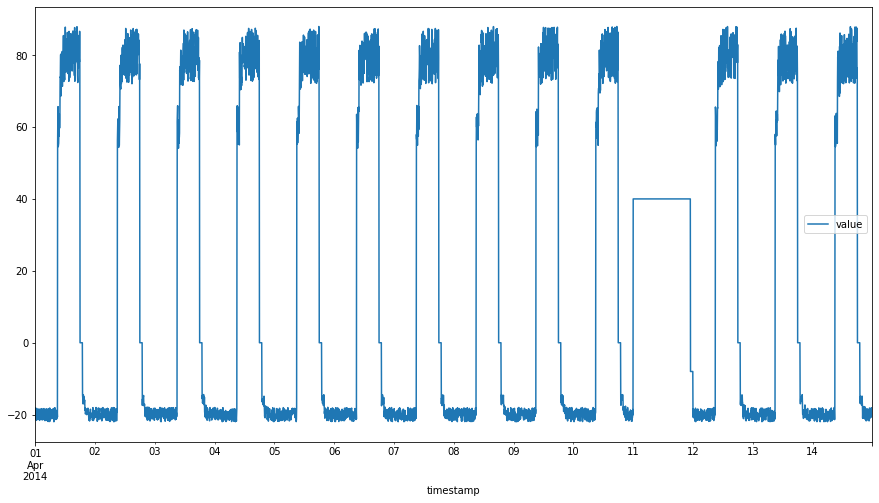

In [33]:
df.plot(figsize=(15, 8))

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [36]:
df = df.dropna()

In [37]:
df.shape

(4032, 1)

In [38]:
df["value"] = pd.to_numeric(df["value"]).astype(np.float64)

In [72]:
result = seasonal_decompose(df["value"], model="additive", freq=((24*60)//5), extrapolate_trend="freq")

/Users/cn180450/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


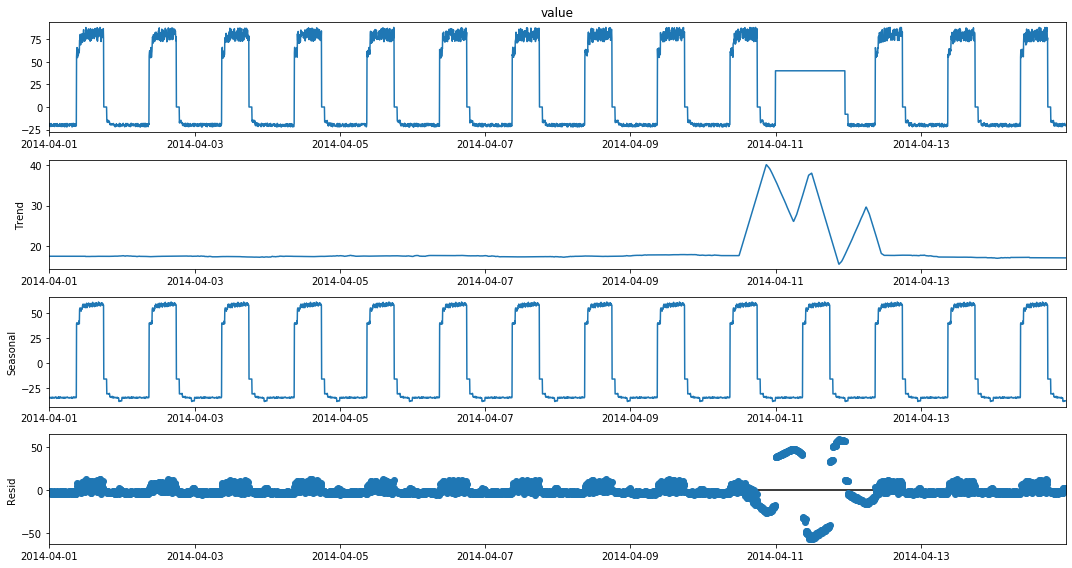

In [81]:
from pylab import rcParams
rcParams["figure.figsize"] = 15, 8

result.plot();

In [74]:
trend = result.trend
# trend.plot()
seasonality = result.seasonal
residual = result.resid

In [75]:
# features
# trend - min, max, mean, std
# seasonality - 
# residual - 

In [108]:
# TREND features
feature_min = trend.min()
feature_max = trend.max()
feature_std = trend.std()
feature_mean = trend.mean()
print(feature_min, feature_max, feature_mean, feature_std)

15.546970229757639 40.077796484036305 18.980270747756695 4.40748569000211


In [109]:
from entropy import spectral_entropy

In [110]:
# SEASONALITY features
feature_entropy = spectral_entropy(seasonality, sf=((24*60)//5), method="fft")
feature_entropy

1.3947549047505412

In [82]:
from scipy.stats import boxcox

In [88]:
feature_box_cox = boxcox(seasonality)
feature_box_cox

ValueError: Data must be positive.

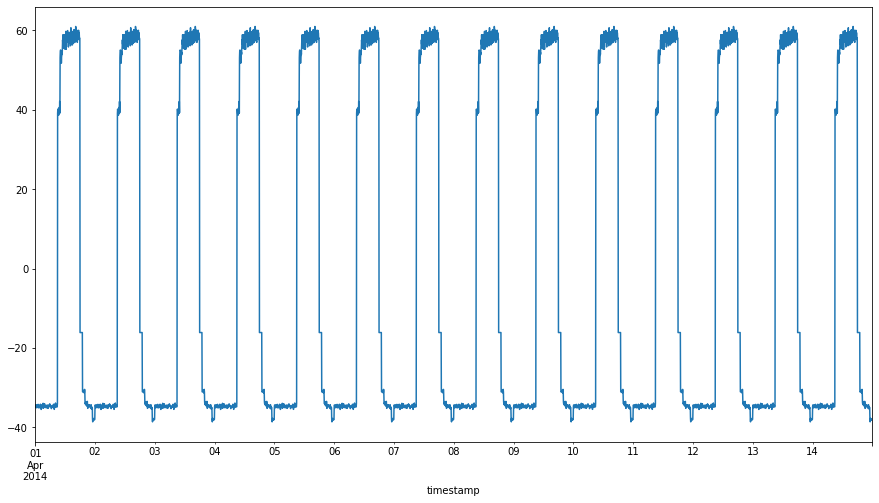

In [96]:
seasonality.plot();

In [101]:
print(seasonality.max())
print(seasonality.mean())
print(seasonality.min())

60.93310941739207
2.93239859202581e-15
-38.59445250505058


In [116]:
positive_seasonality = seasonality + abs(seasonality.min()) + 1

In [117]:
print(positive_seasonality.max())
print(positive_seasonality.mean())
print(positive_seasonality.min())

100.52756192244266
39.59445250505058
1.0


In [127]:
#positive_seasonality.plot()
feature_box_cox = boxcox(positive_seasonality)
print(type(feature_box_cox[0]))
print(type(feature_box_cox[1]))


<class 'numpy.ndarray'>
<class 'numpy.float64'>
